# Linear regression From Scratch

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

## Make data proper for regression

- **`datasets.make_regression`**: This function from `scikit-learn` generates w random regression problem.
- **`train_test_split`**: This function from `scikit-learn` splits the dataset into training and testing sets.

In [41]:
bias = 0
X, y, weight = datasets.make_regression(n_samples=100, n_features=1, noise=25, random_state=4, bias=bias, coef=True)

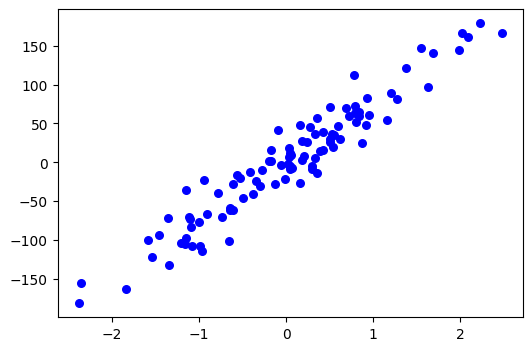

In [42]:
fig = plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

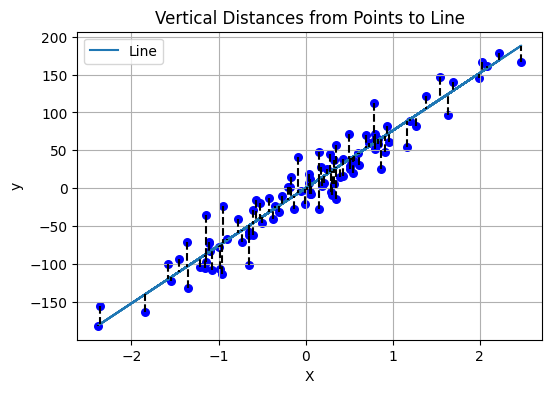

In [43]:

w = weight

# Function to calculate the y-coordinate on the line for w given x
def y_on_line(w, bias, x):
    return (w*x + bias) 

# Plot the line

y_vals = (w*X + bias)
plt.figure(figsize=(6,4)) 
plt.plot(X, y_vals, label='Line')

for x_point, y_point in zip(X,y):
    x_point = x_point[0]
    y_line = y_on_line(w, bias, x_point)
    
    plt.scatter(x_point, y_point, color = "b", marker = "o", s = 30)
    plt.plot([x_point, x_point], [y_point, y_line], 'k--')  # Dashed vertical line for the distance

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Vertical Distances from Points to Line')
plt.grid(True)
plt.show()


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (80, 1)
Testing data shape: (20, 1)


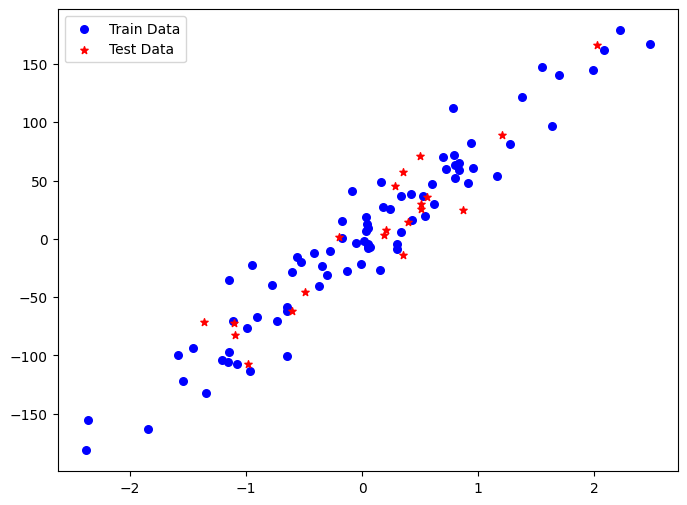

In [45]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], y_train, color = "b", marker = "o", s = 30, label='Train Data')
plt.scatter(X_test[:, 0], y_test, color = "r", marker = "*", s = 30, label='Test Data')
plt.legend()
plt.show()


In linear regression, the goal is to find a line that can fit to this data

In [46]:
# This function calculates the Mean Squared Error (MSE) between the actual values (`y_test`) 
# and the predicted values (`predictions`).
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)


In [47]:
import numpy as np


class LinearRegression:

    def __init__(self, lr = 0.001, n_iters=300):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.mse_list = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            
            y_pred_line = self.predict(X)
            mse_train = mse(y_train, y_pred_line)
            self.mse_list.append(mse_train)
            if i % 100 == 0:
                fig = plt.figure(figsize=(4,2))
                m1 = plt.scatter(X_train[:, 0], y_train, color = "b", marker = "o", s = 30, label='Train Data')
                m2 = plt.scatter(X_test[:, 0], y_test, color = "r", marker = "*", s = 30, label='Test Data')
                plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
                plt.title(f'Epoch: {i} \n weight: {round(self.weights[0], 2)}  bias: {round(self.bias, 2)}\n mse: {round(mse_train,2)}')
                plt.show()
            

    def predict(self, X):
        
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred



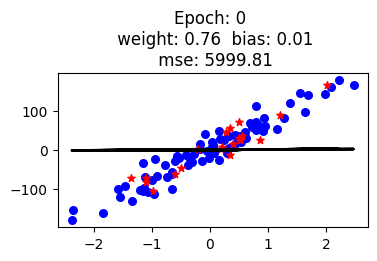

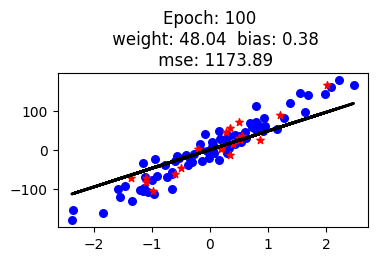

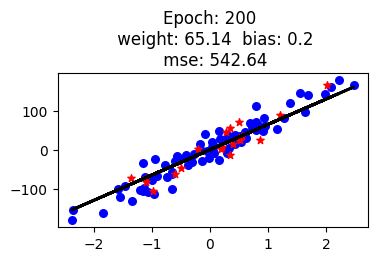

In [48]:
reg = LinearRegression(lr=0.01)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)


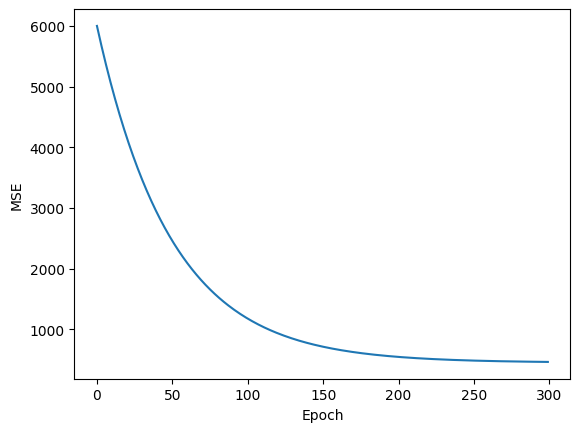

In [49]:
plt.plot(reg.mse_list)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [50]:

mse = mse(y_test, predictions)
print(mse)

481.3663083506249


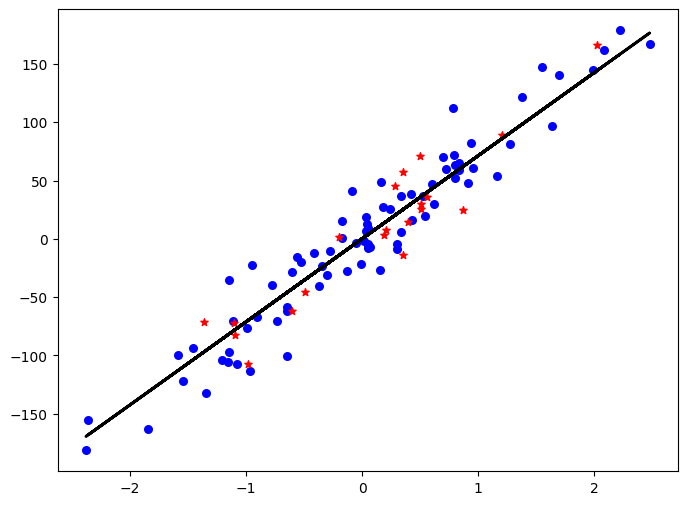

In [51]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train[:, 0], y_train, color = "b", marker = "o", s = 30, label='Train Data')
m2 = plt.scatter(X_test[:, 0], y_test, color = "r", marker = "*", s = 30, label='Test Data')
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

In [52]:
# import numpy as np
# import matplotlib.pyplot as plt
# X, y = datasets.make_regression(n_samples=100, n_features=1, noise=25, random_state=4)
# # Define the line ax + by + c = 0
# # a, b, c = 1, -1, 0  # Example coefficients for the line x - y - 2 = 0
# w = reg.weights[0]
# b = reg.bias
# # print(w,b)
# # a, b, c = 1, -1, 0
# a = w
# c = b  
# b = -1
# # Define the points
# points = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])

# # Function to calculate the y-coordinate on the line for a given x
# def y_on_line(a, b, c, x):
#     return (-a*x - c) / b

# # Plot the line
# # x_vals = np.linspace(0, 5, 100)
# y_vals = (a*X + c) / -b
# plt.plot(X, y_vals, label='Line')

# for x_point, y_point in zip(X,y):
#     # print(x_point[0], y_point)
#     x, y = x_point[0], y_point
#     y_line = y_on_line(a, b, c, x)
#     plt.scatter(x, y, color = "b", marker = "o", s = 30)
#     plt.plot([x, x], [y, y_line], 'k--')  # Dashed vertical line for the distance

# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.legend()
# plt.title('Vertical Distances from Points to Line')
# plt.grid(True)
# plt.show()



### Gradient Descent

- **Prediction**: 
  $$ \hat{y} = X \cdot \text{weights} + \text{bias} $$
  where \( \hat{y} \) is the predicted value.

- **Gradients**:
  - Weight gradient:
    $$ dw = \frac{1}{n_{\text{samples}}} \cdot X^T \cdot (\hat{y} - y) $$
  - Bias gradient:
    $$ db = \frac{1}{n_{\text{samples}}} \cdot \sum (\hat{y} - y) $$

- **Update Rules**:
  - Update weights:
    $$ \text{weights} = \text{weights} - \text{lr} \cdot dw $$
  - Update bias:
    $$ \text{bias} = \text{bias} - \text{lr} \cdot db $$

### Predict Method
```python
def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred
```
- **Prediction**:
  $$ \hat{y} = X \cdot \text{weights} + \text{bias} $$

This method uses the learned weights and bias to predict the target values for new data.
